In [16]:
import pandas as pd
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Read the maestro-v3.0.0.csv file into a pandas DataFrame
metadata = pd.read_csv('/Users/caslabs/Documents/labs/APPLYAI/music-generation/data/maestro-dataset/maestro-v3.0.0.csv')

# Analyze the data
print(metadata['canonical_composer'].value_counts())

# Separate features (X) and target (y) columns
X = metadata.drop('canonical_composer', axis=1)
y = metadata['canonical_composer']

# Initialize oversampler and/or undersampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply oversampling and/or undersampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Combine resampled features and target into a single DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Shuffle the balanced data
balanced_data = shuffle(balanced_data, random_state=42)

# Reset the index
balanced_data.reset_index(drop=True, inplace=True)

# Now you have a balanced dataset in the 'balanced_data' DataFrame
#print(balanced_data['canonical_composer'].value_counts())

# Save the balanced metadata to a new CSV file
balanced_data.to_csv('balanced_maestro-v3.0.0.csv', index=False)

Frédéric Chopin                                       201
Franz Schubert                                        186
Ludwig van Beethoven                                  146
Johann Sebastian Bach                                 145
Franz Liszt                                           131
Sergei Rachmaninoff                                    59
Robert Schumann                                        49
Claude Debussy                                         45
Joseph Haydn                                           40
Wolfgang Amadeus Mozart                                38
Alexander Scriabin                                     35
Domenico Scarlatti                                     31
Felix Mendelssohn                                      28
Johannes Brahms                                        26
Franz Schubert / Franz Liszt                           10
Isaac Albéniz                                           7
Muzio Clementi                                          6
Pyotr Ilyich T

In [17]:
balanced_data

,canonical_title,split,year,midi_filename,audio_filename,duration,canonical_composer
0,Suite Op. 10,train,2006,2006/MIDI-Unprocessed_06_R1_2006_01-04_ORIG_MI...,2006/MIDI-Unprocessed_06_R1_2006_01-04_ORIG_MI...,1364.704832,George Enescu
1,"The Seasons, Op. 37a (Selections)",train,2014,2014/MIDI-UNPROCESSED_16-18_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_16-18_R1_2014_MID--AUDIO...,469.876667,Pyotr Ilyich Tchaikovsky
2,"Suite in C Major, Z. 666 (Complete)",train,2014,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,538.800209,Henry Purcell
3,Hungarian Rhapsody No. 2 (Horowitz Edition),validation,2008,2008/MIDI-Unprocessed_09_R2_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_09_R2_2008_01-05_ORIG_MI...,529.540069,Franz Liszt / Vladimir Horowitz
4,Etude No. 6 in A Minor,train,2008,2008/MIDI-Unprocessed_16_R1_2008_01-04_ORIG_MI...,2008/MIDI-Unprocessed_16_R1_2008_01-04_ORIG_MI...,278.921997,Niccolò Paganini / Franz Liszt
...,...,...,...,...,...,...,...
12055,"Sonata in B-flat Major, K. 570, 1st mov.",train,2013,2013/ORIG-MIDI_02_7_7_13_Group__MID--AUDIO_18_...,2013/ORIG-MIDI_02_7_7_13_Group__MID--AUDIO_18_...,261.801287,Wolfgang Amadeus Mozart
12056,"Suite in C Major, Z. 666 (Complete)",train,2014,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,538.800209,Henry Purcell
12057,Triana from 'Iberia',train,2004,2004/MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORI...,2004/MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORI...,259.816541,Isaac Albéniz
12058,Faust Waltz,train,2006,2006/MIDI-Unprocessed_08_R1_2006_01-04_ORIG_MI...,2006/MIDI-Unprocessed_08_R1_2006_01-04_ORIG_MI...,557.392605,Charles Gounod / Franz Liszt


In [18]:
import pandas as pd

# Read the maestro-v3.0.0.csv file into a pandas DataFrame
metadata = pd.read_csv('/Users/caslabs/Documents/labs/APPLYAI/music-generation/data/maestro-dataset/maestro-v3.0.0.csv')

# Set the number of top composers to include
N = 5  # You can adjust this value to your preference

# Select the top N composers based on the number of compositions
top_composers = metadata['canonical_composer'].value_counts().nlargest(N).index

# Filter the dataset to only include the top N composers
filtered_data = metadata[metadata['canonical_composer'].isin(top_composers)]

# Save the filtered metadata to a new CSV file
filtered_data.to_csv('filtered_maestro-v3.0.0.csv', index=False)


In [19]:
#composition amount by composer
print(filtered_data['canonical_composer'].value_counts())

Frédéric Chopin          201
Franz Schubert           186
Ludwig van Beethoven     146
Johann Sebastian Bach    145
Franz Liszt              131
Name: canonical_composer, dtype: int64


In [20]:
import pandas as pd

# Read the maestro-v3.0.0.csv file into a pandas DataFrame
metadata = pd.read_csv('/Users/caslabs/Documents/labs/APPLYAI/music-generation/data/maestro-dataset/maestro-v3.0.0.csv')

# Set the number of compositions to include for each composer
N = 131  # You can adjust this value to your preference

# Select the top five composers based on the number of compositions
top_composers = metadata['canonical_composer'].value_counts().nlargest(5).index

# Filter the dataset to only include the top five composers and N compositions for each composer
filtered_data = metadata[metadata['canonical_composer'].isin(top_composers)].groupby('canonical_composer').head(N)

# Save the filtered metadata to a new CSV file
filtered_data.to_csv('filtered_maestro-v3.0.0.csv', index=False)


In [23]:
print(filtered_data['canonical_title'].value_counts())

Sonata in B-flat Major, D960                               10
Ballade No. 1 in G Minor, Op. 23                           10
Sonata in A Min.                                            8
Thirty-Two Variations in C Minor, WoO 80                    7
Sonata No. 21, Op. 53, "Waldstein", I. Allegro con brio     6
                                                           ..
Berceuse Op. 57 in D-flat Major                             1
Berceuse Op. 57                                             1
Hungarian Rhapsody, No. 12                                  1
Barcarolle in F-sharp Major, Op. 60                         1
Hungarian Rhapsody                                          1
Name: canonical_title, Length: 407, dtype: int64


In [22]:
filtered_data[''].unique

<bound method Series.unique of 156              Franz Liszt
157              Franz Liszt
158              Franz Liszt
159              Franz Liszt
160              Franz Liszt
                ...         
1064    Ludwig van Beethoven
1065    Ludwig van Beethoven
1066    Ludwig van Beethoven
1067    Ludwig van Beethoven
1068    Ludwig van Beethoven
Name: canonical_composer, Length: 655, dtype: object>

<Axes: >

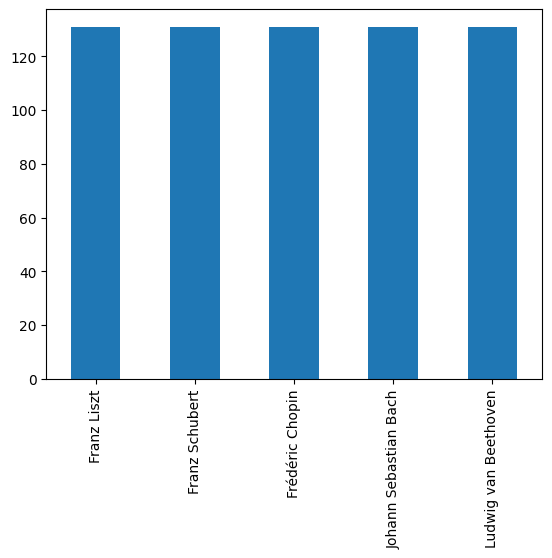

In [10]:
import os
import shutil
import pandas as pd

# Read the filtered CSV file into a pandas DataFrame
filtered_data = pd.read_csv('filtered_maestro-v3.0.0.csv')

# Define the target directory
target_dir = '/Users/caslabs/Documents/port/music-generation/data/balanced_maestro'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Copy the MIDI files from the source directory to the target directory
for midi_filepath in filtered_data['midi_filepath']:
    src_file = midi_filepath
    file_name = os.path.basename(midi_filepath)
    dst_file = os.path.join(target_dir, file_name)
    
    # Copy the file
    shutil.copy(src_file, dst_file)

# Now all the MIDI files listed in the 'midi_filepath' column have been copied to the target directory

In [ ]:
# Enumerate midi_filename and copy the filename path to a new directory
filtered_data = pd.read_csv('filtered_maestro-v3.0.0.csv')

# Define the source and target directories
source_dir = '/path/to/original/midi/files'
target_dir = '/path/to/new/directory'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Copy the MIDI files from the source directory to the target directory
for midi_filename in filtered_data['midi_filename']:
    src_file = os.path.join(source_dir, midi_filename)
    dst_file = os.path.join(target_dir, midi_filename)
    
    # Copy the file
    shutil.copy(src_file, dst_file)

# Now all the MIDI files listed in the 'midi_filename' column have been copied to the target directory

In [15]:
filtered_data.head(10)

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
156,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,273.162120
157,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_10_R1_2008_01-04_ORIG_MI...,2008/MIDI-Unprocessed_10_R1_2008_01-04_ORIG_MI...,265.471155
158,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MI...,2008/MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MI...,269.971685
159,Franz Liszt,Annes de Pelerinage III: Le jeux d'eau a la Vi...,train,2011,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,428.272809
160,Franz Liszt,Après une lecture de Dante: Fantasia quasi Son...,train,2014,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,1027.349400
161,Franz Liszt,Aprés une lecture de Dante: Fantasia quasi Son...,train,2014,2014/MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AU...,2014/MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AU...,997.267966
162,Franz Liszt,Au bord d'une source,test,2013,2013/ORIG-MIDI_02_7_6_13_Group__MID--AUDIO_08_...,2013/ORIG-MIDI_02_7_6_13_Group__MID--AUDIO_08_...,219.655229
163,Franz Liszt,"Ballade No. 2 in B Minor, S 171",train,2013,2013/ORIG-MIDI_01_7_8_13_Group__MID--AUDIO_04_...,2013/ORIG-MIDI_01_7_8_13_Group__MID--AUDIO_04_...,747.902564
164,Franz Liszt,"Ballade No. 2 in B Minor, S 171",train,2013,2013/ORIG-MIDI_03_7_8_13_Group__MID--AUDIO_15_...,2013/ORIG-MIDI_03_7_8_13_Group__MID--AUDIO_15_...,741.736705
165,Franz Liszt,"Ballade No. 2 in B Minor, S. 171",train,2014,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO...,856.576334


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the filtered_maestro-v3.0.0.csv file into a pandas DataFrame
metadata = pd.read_csv('filtered_maestro-v3.0.0.csv')

# Set the size of the validation and testing sets
val_size = 0.3
test_size = 0.2

# Split the data into training, validation, and testing sets
train_data, val_test_data = train_test_split(metadata, test_size=val_size+test_size, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=test_size/(val_size+test_size), random_state=42)

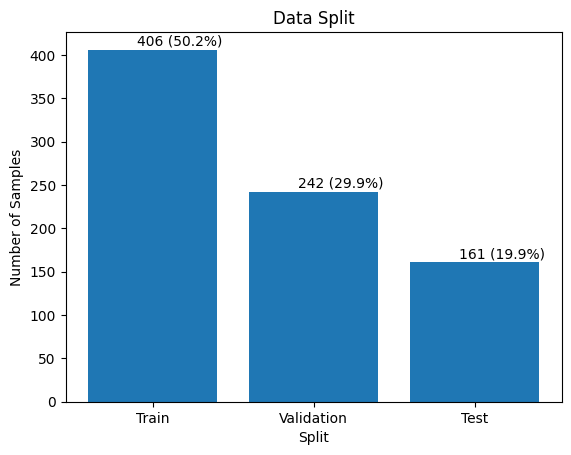

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the filtered_maestro-v3.0.0.csv file into a pandas DataFrame
metadata = pd.read_csv('filtered_maestro-v3.0.0.csv')

# Set the size of the validation and testing sets
val_size = 0.3
test_size = 0.2

# Calculate the number of samples for each split
total_size = len(metadata)
train_size = len(metadata) - int(val_size * total_size) - int(test_size * total_size)
val_size = int(val_size * total_size)
test_size = int(test_size * total_size)

# Calculate the percentage of samples for each split
train_pct = train_size / total_size * 100
val_pct = val_size / total_size * 100
test_pct = test_size / total_size * 100

# Plot the bar chart
split_names = ['Train', 'Validation', 'Test']
split_sizes = [train_size, val_size, test_size]
plt.bar(split_names, split_sizes)
plt.title('Data Split')
plt.xlabel('Split')
plt.ylabel('Number of Samples')
plt.text(-0.1, train_size + 5, f'{train_size} ({train_pct:.1f}%)')
plt.text(0.9, val_size + 5, f'{val_size} ({val_pct:.1f}%)')
plt.text(1.9, test_size + 5, f'{test_size} ({test_pct:.1f}%)')
plt.show()
